# load dataset and initialize vectors

In [1]:

from keras.datasets import imdb
import numpy as np
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt


In [2]:

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape, train_labels.shape)


def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# vectorize data and its labels
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000],  y_train[10000:]


17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


# Create Hidden Layers Model


In [3]:

def _plot(history, n_layers, n_epochs):
    plt_title = f'{n_layers} layer(s)'

    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']

    epochs = range(1, n_epochs + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

    plt.title(f'Training and Validation Loss, {plt_title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def build_model(n_layers, loss, activation, n_units=2):

    model = models.Sequential()

    if n_layers == 1:                       # TODO put in one loop
        # one hidden layer
        model.add(layers.Dense(n_units, activation=activation, input_shape=(10000,)))

    elif n_layers == 2:
        # two hidden layers
        model.add(layers.Dense(n_units, activation=activation, input_shape=(10000,)))
        model.add(layers.Dense(1, activation='sigmoid'))

    elif n_layers == 3:
        # three hidden layers
        model.add(layers.Dense(n_units, activation=activation, input_shape=(10000,)))
        model.add(layers.Dense(n_units, activation=activation))
        model.add(layers.Dense(1, activation='sigmoid'))

    if loss == 'mse':
        loss = losses.mse

    elif loss == 'binary_crossentropy':
        loss = losses.binary_crossentropy

    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss=loss,
                metrics=[metrics.binary_accuracy])         # metrics=['accuracy'] | metrics=['acc']

    return model

def fit_model(n_layers, n_epochs, loss, act):

    model = build_model(n_layers, loss, act)

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=n_epochs,
                        batch_size=512,
                        validation_data=(x_val, y_val))

    return history

def _model(n_layers, n_epochs=10, loss="mse", act="relu"):

    history = fit_model(n_layers, n_epochs, loss, act)
    _plot(history, n_layers, n_epochs)


# Fit model with training data and plot loss over time

Epoch 1/10
30/30 [==============================] - 4s 108ms/step - loss: 0.2087 - binary_accuracy: 0.6854 - val_loss: 0.1480 - val_binary_accuracy: 0.7954
Epoch 2/10
30/30 [==============================] - 1s 45ms/step - loss: 0.1186 - binary_accuracy: 0.8558 - val_loss: 0.1210 - val_binary_accuracy: 0.8499
Epoch 3/10
30/30 [==============================] - 2s 51ms/step - loss: 0.0941 - binary_accuracy: 0.8960 - val_loss: 0.1121 - val_binary_accuracy: 0.8704
Epoch 4/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0812 - binary_accuracy: 0.9147 - val_loss: 0.1089 - val_binary_accuracy: 0.8717
Epoch 5/10
30/30 [==============================] - 1s 42ms/step - loss: 0.0721 - binary_accuracy: 0.9288 - val_loss: 0.1117 - val_binary_accuracy: 0.8622
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.0662 - binary_accuracy: 0.9376 - val_loss: 0.1140 - val_binary_accuracy: 0.8755
Epoch 7/10
30/30 [==============================] - 1s 50ms/step - lo

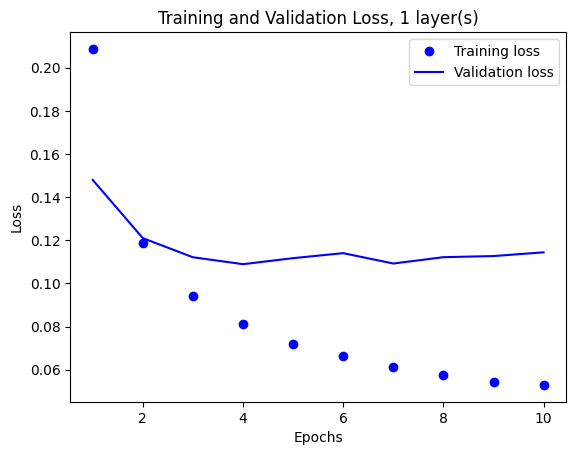

In [4]:

_model(n_layers = 1)


Epoch 1/10
30/30 [==============================] - 3s 100ms/step - loss: 0.2160 - binary_accuracy: 0.7155 - val_loss: 0.1817 - val_binary_accuracy: 0.8276
Epoch 2/10
30/30 [==============================] - 1s 42ms/step - loss: 0.1590 - binary_accuracy: 0.8621 - val_loss: 0.1479 - val_binary_accuracy: 0.8558
Epoch 3/10
30/30 [==============================] - 1s 42ms/step - loss: 0.1281 - binary_accuracy: 0.8885 - val_loss: 0.1288 - val_binary_accuracy: 0.8690
Epoch 4/10
30/30 [==============================] - 1s 44ms/step - loss: 0.1084 - binary_accuracy: 0.9047 - val_loss: 0.1145 - val_binary_accuracy: 0.8795
Epoch 5/10
30/30 [==============================] - 2s 77ms/step - loss: 0.0947 - binary_accuracy: 0.9145 - val_loss: 0.1058 - val_binary_accuracy: 0.8828
Epoch 6/10
30/30 [==============================] - 2s 60ms/step - loss: 0.0845 - binary_accuracy: 0.9223 - val_loss: 0.1007 - val_binary_accuracy: 0.8829
Epoch 7/10
30/30 [==============================] - 2s 67ms/step - lo

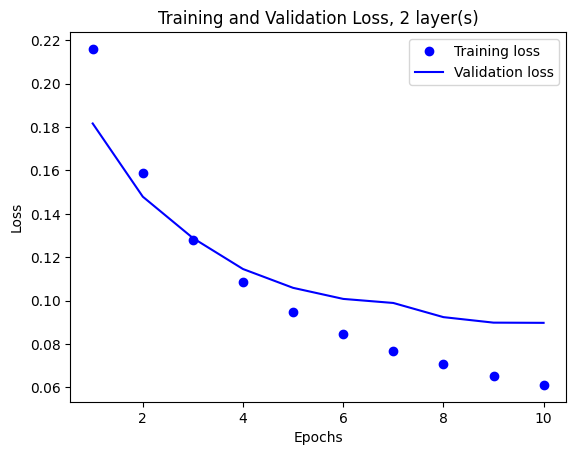

In [5]:

_model(n_layers = 2)


Epoch 1/10
30/30 [==============================] - 4s 102ms/step - loss: 0.2359 - binary_accuracy: 0.6268 - val_loss: 0.2227 - val_binary_accuracy: 0.6611
Epoch 2/10
30/30 [==============================] - 2s 52ms/step - loss: 0.2124 - binary_accuracy: 0.7246 - val_loss: 0.2055 - val_binary_accuracy: 0.7281
Epoch 3/10
30/30 [==============================] - 2s 52ms/step - loss: 0.1955 - binary_accuracy: 0.7774 - val_loss: 0.1924 - val_binary_accuracy: 0.8001
Epoch 4/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1820 - binary_accuracy: 0.8186 - val_loss: 0.1829 - val_binary_accuracy: 0.7713
Epoch 5/10
30/30 [==============================] - 2s 51ms/step - loss: 0.1708 - binary_accuracy: 0.8422 - val_loss: 0.1737 - val_binary_accuracy: 0.8492
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1613 - binary_accuracy: 0.8674 - val_loss: 0.1660 - val_binary_accuracy: 0.8425
Epoch 7/10
30/30 [==============================] - 2s 51ms/step - lo

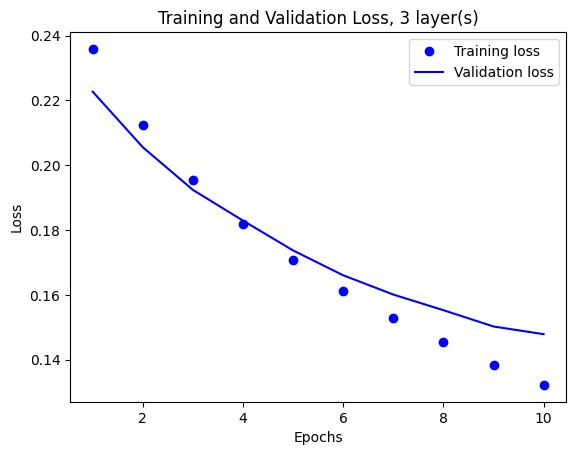

In [6]:

_model(n_layers = 3)
